#### Write this as a brief summary of your interests and intent, including:

* The kind of data you'd like to work with/field you're interested in (e.g., geodata, weather data, etc.)

* The kinds of questions you'll be asking of that data

* Possible source for such data

In other words, write down what kind of data you plan to work with, and what kinds of questions you'd like to ask of it. This constitutes your Project Proposal/Outline, and should look something like this:

> Our project is to uncover patterns in criminal activity around Los Angeles. We'll examine relationships between types of crime and location; crime rates and times of day; trends in crime rates over the course of the year; and related questions, as the data admits.

#### Finding Data

Once your group has written an outline, it's time to start hunting for data. You are free to use data from any source, but we recommend the following curated sources of high-quality data:

* [data.world](https://data.world/)

* [Kaggle](https://www.kaggle.com/)

* [Data.gov](https://www.data.gov)

* [Public APIs](https://github.com/abhishekbanthia/Public-APIs)

* [Awesome-APIs List](https://github.com/Kikobeats/awesome-api)

* [Medium APIs List](https://medium.com/@benjamin_libor/a-curated-collection-of-over-150-apis-to-build-great-products-fdcfa0f361bc)

Chances are you'll have to update your Project Outline as you explore the available data. **This is fine**—adjustments like this are part of the process! Just make sure everyone in the group is up-to-speed on the goals of the project as you make changes.

Make sure that your data is not too large for local analysis. **Big Data** datasets are difficult to manage locally, so consider a subset of that data or a different dataset altogether.

#### Data Cleanup & Analysis

With data in hand, it's time to tackle development and analysis. This is where the fun starts!

Inevitably, the analysis process can be broken into two broad phases: **Exploration & Cleanup** and **Analysis** proper.

As you've learned, you'll need to explore, clean, and reformat your data before you can begin to answer your research questions. We recommend keeping track of these exploration and cleanup steps in a dedicated Jupyter Notebook, both for organization's sake and to make it easier to  present your work later.

Similarly, after you've massaged your data and are ready to start crunching numbers, you should keep track of your work in a Jupyter Notebook dedicated specifically to analysis.

During both phases, **don't forget to include plots**! Don't make the mistake of waiting to build figures until you're preparing your presentation. Creating them along the way can reveal insights and interesting trends in the data that you might not notice otherwise.

We recommend focusing your analysis on techniques such as aggregation, correlation, comparison, summary statistics, sentiment analysis, and time series analysis.

Finally, be sure that your projects meet the [technical requirements](TechnicalRequirements.md).


### Import our dependicies 

In [6]:
import pandas as pd 
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import matplotlib as mpl
from pandas import DataFrame

%matplotlib inline

csv_pathSO = "overdose_processed_states.csv"
StateOverdose_df = pd.read_csv(csv_pathSO)

StateOverdose_df.head(10)

,State,Year,Deaths,Death_Rate,Pct_of_Total_Deaths,Multiple_Cause_of_death,log_of_Deaths,log_of_Pct_of_Deaths,log_of_Death_Rate
0,Wyoming,2000,NaN,NaN,NaN,Heroin,NaN,NaN,NaN
1,Wyoming,2000,NaN,NaN,NaN,Other opioids,NaN,NaN,NaN
2,Wyoming,2000,NaN,NaN,NaN,Methadone,NaN,NaN,NaN
3,Wyoming,2000,NaN,NaN,NaN,Other synthetic narcotics,NaN,NaN,NaN
4,Wyoming,2000,0.0,0.0,0.0,All Opioids,0.0,0.0,0.0
5,Wyoming,2001,NaN,NaN,NaN,Heroin,NaN,NaN,NaN
6,Wyoming,2001,NaN,NaN,NaN,Other opioids,NaN,NaN,NaN
7,Wyoming,2001,NaN,NaN,NaN,Methadone,NaN,NaN,NaN
8,Wyoming,2001,NaN,NaN,NaN,Other synthetic narcotics,NaN,NaN,NaN
9,Wyoming,2001,0.0,0.0,0.0,All Opioids,0.0,0.0,0.0


### Import data
    Import all data sets needed to analyze our hypothesis

In [7]:
StateOverdose_df = StateOverdose_df.dropna(how="any")
StateOverdose_df.head(10)

,State,Year,Deaths,Death_Rate,Pct_of_Total_Deaths,Multiple_Cause_of_death,log_of_Deaths,log_of_Pct_of_Deaths,log_of_Death_Rate
4,Wyoming,2000,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
9,Wyoming,2001,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
14,Wyoming,2002,10.0,0.0,0.0,All Opioids,2.302585,0.0,0.000000
19,Wyoming,2003,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
24,Wyoming,2004,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
29,Wyoming,2005,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
34,Wyoming,2006,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
39,Wyoming,2007,0.0,0.0,0.0,All Opioids,0.000000,0.0,0.000000
41,Wyoming,2008,24.0,5.8,0.0,Other opioids,3.178054,0.0,1.757858
44,Wyoming,2008,35.0,5.8,0.0,All Opioids,3.555348,0.0,1.757858


In [8]:
filter_data = StateOverdose_df [StateOverdose_df["Multiple_Cause_of_death"] =="All Opioids"]
#filter_data

### Clean Data
    -Merge tables with similar data
    -Rename columns
    -Delete duplicates


In [9]:
Grouped = filter_data.groupby(["State", "Year"])

pd.set_option('display.max_rows', None)
Grouped.first()

Deaths  Death_Rate  Pct_of_Total_Deaths  \
State                Year                                            
Alabama              2000    51.0         0.8                  0.0   
                     2001    55.0         1.6                  0.0   
                     2002    66.0         2.0                  0.0   
                     2003    50.0         1.5                  0.0   
                     2004   100.0         2.6                  0.0   
                     2005    85.0         2.1                  0.0   
                     2006   143.0         4.1                  0.0   
                     2007   174.0         5.0                  0.0   
                     2008   202.0         5.2                  0.0   
                     2009   225.0         5.9                  0.0   
                     2010   197.0         5.3                  0.0   
                     2011   192.0         4.8                  0.0   
                     2012   178.0         4.3                  0.0   
                     2013   187.0         5.0                  0.0   
                     2014   315.0         8.3                  0.0   
                     2015   315.0         8.4                  0.0   
Alaska               2000    21.0         4.8                  0.0   
                     2001    10.0         0.0                  0.0   
                     2002     0.0         0.0                  0.0   
                     2003    10.0         0.0                  0.0   
                     2004     0.0         0.0                  0.0   
                     2005     0.0         0.0                  0.0   
                     2006    25.0         0.0                  0.0   
                     2007     0.0         0.0                  0.0   
                     2008    96.0        16.3                  0.0   
                     2009   105.0        20.5                  0.0   
                     2010    83.0        13.8                  0.0   
                     2011    68.0         7.3                  0.0   
                     2012    74.0        11.7                  0.0   
                     2013    74.0        11.3                  0.0   
                     2014    94.0        12.3                  0.0   
                     2015   115.0        16.7                  0.0   
Arizona              2000   144.0         2.5                  0.0   
                     2001   156.0         4.0                  0.0   
                     2002   244.0         6.2                  0.0   
                     2003   294.0         7.3                  0.0   
                     2004   285.0         6.8                  0.0   
                     2005   333.0         7.7                  0.1   
                     2006   391.0         8.8                  0.1   
                     2007   408.0         8.9                  0.1   
                     2008   469.0        10.1                  0.1   
                     2009   560.0        11.9                  0.1   
                     2010   604.0        12.7                  0.1   
                     2011   550.0        11.2                  0.1   
                     2012   544.0        11.0                  0.1   
                     2013   523.0        10.4                  0.1   
                     2014   628.0        12.3                  0.2   
                     2015   716.0        13.8                  0.2   
Arkansas             2000     0.0         0.0                  0.0   
                     2001    14.0         0.0                  0.0   
                     2002   100.0         4.9                  0.0   
                     2003   121.0         5.9                  0.0   
                     2004   151.0         7.3                  0.0   
                     2005   144.0         6.9                  0.0   
                     2006   170.0         8.0                  0.0   
                     2007   179.0    

In [10]:
#pivottable = pd.pivot_table(filter_data, values='Deaths', index=['State'], columns=['Year'], aggfunc=np.sum)
#pivottable

In [11]:
csv_pathML = "states_and_dates_MEDRED.csv"
MarijuanaLegal_df = pd.read_csv(csv_pathML) 

#MarijuanaLegal_df

In [12]:
#merge_table = pd.merge(StateOverdose_df, MarijuanaLegal_df, left_on="State", right_on="State", how="left")
#merge_table 

merge_table = pd.merge(StateOverdose_df, MarijuanaLegal_df, left_on=["State","Year"], right_on=['states','Year'], how="left")
merge_table.count()


State                      3095
Year                       3095
Deaths                     3095
Death_Rate                 3095
Pct_of_Total_Deaths        3095
Multiple_Cause_of_death    3095
log_of_Deaths              3095
log_of_Pct_of_Deaths       3095
log_of_Death_Rate          3095
states                     2912
Medical                    2912
Recreational               2912
dtype: int64

In [13]:
merge_table = merge_table.dropna(how='any')
merge_table.count()

State                      2912
Year                       2912
Deaths                     2912
Death_Rate                 2912
Pct_of_Total_Deaths        2912
Multiple_Cause_of_death    2912
log_of_Deaths              2912
log_of_Pct_of_Deaths       2912
log_of_Death_Rate          2912
states                     2912
Medical                    2912
Recreational               2912
dtype: int64

In [14]:
#merge dataset together
merge_table_clean = merge_table [['State','Year','Death_Rate','Deaths','Multiple_Cause_of_death','Medical','Recreational']]
Main_Table =merge_table_clean [merge_table_clean["Multiple_Cause_of_death"] =="All Opioids"]
#Main_Table

In [15]:
#cut in percent change in # of deaths to table
pchange=Main_Table['percent_change'] = Main_Table.groupby(["State"]).Deaths.pct_change(fill_method ='bfill')
Main_Table = Main_Table.replace([np.inf, -np.inf], np.nan)
Main_Table



D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,State,Year,Death_Rate,Deaths,Multiple_Cause_of_death,Medical,Recreational,percent_change
0,Wyoming,2000,0.0,0.0,All Opioids,False,False,NaN
1,Wyoming,2001,0.0,0.0,All Opioids,False,False,NaN
2,Wyoming,2002,0.0,10.0,All Opioids,False,False,NaN
3,Wyoming,2003,0.0,0.0,All Opioids,False,False,-1.000000
4,Wyoming,2004,0.0,0.0,All Opioids,False,False,NaN
5,Wyoming,2005,0.0,0.0,All Opioids,False,False,NaN
6,Wyoming,2006,0.0,0.0,All Opioids,False,False,NaN
7,Wyoming,2007,0.0,0.0,All Opioids,False,False,NaN
9,Wyoming,2008,5.8,35.0,All Opioids,False,False,NaN
10,Wyoming,2009,0.0,27.0,All Opioids,False,False,-0.228571


### Analysis Question One:
Which drugs are considered opioids, and which have the highest mortality rate? Create a data frame that lists all drugs that are recognized as opioids in the US. Create a bar chart to visualize which opioids have the highest mortality rates.

,Deaths
Multiple_Cause_of_death,
Heroin,66580.0
Methadone,57770.0
Other opioids,131352.0
Other synthetic narcotics,42010.0


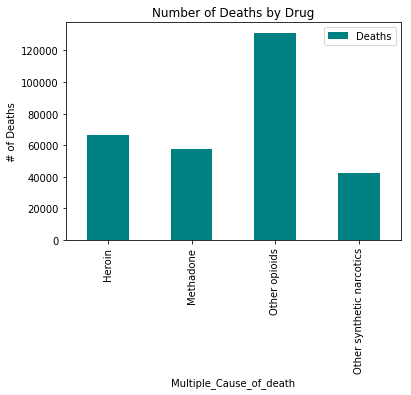

In [16]:
Opiods = merge_table [merge_table["Multiple_Cause_of_death"] !="All Opioids"]
#Drugs = Opiods.Multiple_Cause_of_death.unique()
Opiods = Opiods.groupby(["Multiple_Cause_of_death"]).sum()
Opiods = Opiods.loc[:,["Deaths"]]
Deaths = Opiods["Deaths"]

Opiods.plot(kind="bar",y='Deaths', use_index=True, color="Teal")
plt.title('Number of Deaths by Drug')
plt.ylabel("# of Deaths")
plt.show
Opiods

### Analysis Question Two:
Which states have the highest opioid drug abuse? Create a dataframe showing which states have the highest deaths per capita due to drug abuse. Graph this data. Create a graph that shows this

Text(0,0.5,'Death Rate')

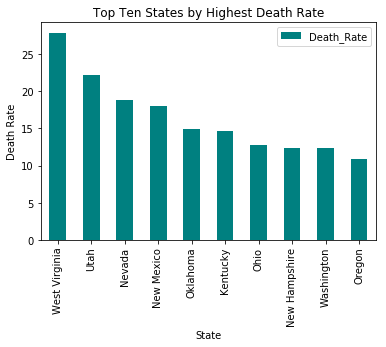

In [17]:
Mean_Data = pd.DataFrame(Main_Table.groupby(['State',])['Death_Rate'].mean())
Mean_Most = Mean_Data.nlargest(10,'Death_Rate')

Mean_Most.plot(kind="bar", y= "Death_Rate", color = 'teal', use_index=True)
plt.title('Top Ten States by Highest Death Rate')
plt.ylabel("Death Rate")

### Analysis Question Three:
Is there a difference with medical marijuana legalization and recreational marijuana legalization 


In [18]:
#Break data table into three seperate gorups. Never legal, Reacreational, Medical

#Recreational

States = Main_Table['State']
RecStates=[]

for index, row in Main_Table.iterrows():
    if row[6] == True:
        RecStates.append(row[0])
        
RecStates = set(RecStates)
print(RecStates)



{'Alaska', 'Washington', 'Colorado', 'Oregon'}


In [19]:
#get medical states
States = Main_Table['State']
MedicalStates=[]

for index, row in Main_Table.iterrows():
    if row[5] == True:
        if row[0] not in RecStates:
            MedicalStates.append(row[0])

MedicalStates=set(MedicalStates)
print(MedicalStates)


{'Vermont', 'Connecticut', 'New Mexico', 'New Hampshire', 'California', 'New Jersey', 'Hawaii', 'Michigan', 'Illinois', 'Rhode Island', 'Louisiana', 'Arizona', 'Nevada', 'Maine', 'Montana', 'New York', 'Delaware', 'Maryland'}


In [20]:
#Rec States Dataframe
RecStates_df = Main_Table[Main_Table['State'].isin(RecStates)]
RecStates_df = RecStates_df [RecStates_df["Death_Rate"] !=0]

RecStates_df.head()

,State,Year,Death_Rate,Deaths,Multiple_Cause_of_death,Medical,Recreational,percent_change
176,Washington,2000,5.8,257.0,All Opioids,True,False,NaN
181,Washington,2001,6.2,279.0,All Opioids,True,False,0.085603
186,Washington,2002,9.0,407.0,All Opioids,True,False,0.458781
191,Washington,2003,9.5,438.0,All Opioids,True,False,0.076167
196,Washington,2004,12.4,581.0,All Opioids,True,False,0.326484


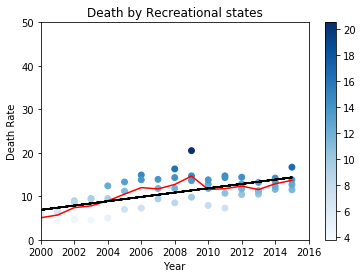

r value: 0.64424770958377


In [21]:
#Rec States linear regression
x = RecStates_df["Year"]
y = RecStates_df["Death_Rate"]
cm = plt.cm.get_cmap('Blues')

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#get average for line plots
aveRec= RecStates_df.groupby(['Year'])
y2=aveRec.mean()["Death_Rate"]


plt.scatter(x,y,c=y, s=35, cmap=cm)
plt.plot(y2, color='r')
plt.plot(x,regress_values,"y-", color="black")
plt.colorbar()
plt.title('Death by Recreational states')
plt.ylabel("Death Rate")
plt.xlabel("Year")
plt.ylim(0,50) 
plt.xlim(2000, 2016) 

plt.show()
print(f'r value: {rvalue}')

In [22]:
#Medical States Dataframe
MedicalStates_df = Main_Table[Main_Table['State'].isin(MedicalStates)]
#MedicalStates_df

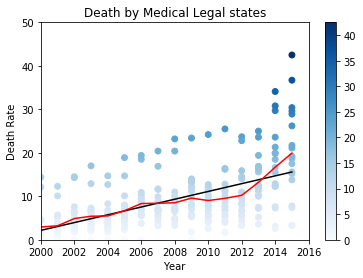

r value: 0.5804566281126238


In [23]:
#Medical stastes data analysis 
x = MedicalStates_df["Year"]
y = MedicalStates_df["Death_Rate"]
cm = plt.cm.get_cmap('Blues')
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#get average for line plots
aveMed= MedicalStates_df.groupby(['Year'])
y2=aveMed.mean()["Death_Rate"]

plt.scatter(x,y, c=y, s=35, cmap=cm)
plt.plot(x,regress_values,"y-", color="black")
plt.plot(y2, color= 'r')
plt.title('Death by Medical Legal states')
plt.ylabel("Death Rate")
plt.xlabel("Year")
plt.ylim(0,50) 
plt.xlim(2000, 2016) 
plt.colorbar()
plt.show()
print(f'r value: {rvalue}')

In [24]:
#States that have never legalized weed
States = Main_Table['State']
NeverStates=[]

for index, row in Main_Table.iterrows():
    if row[5] == False:
        if row[0] not in RecStates and row[0] not in MedicalStates:
            NeverStates.append(row[0])

NeverStates=set(NeverStates)
print(NeverStates)

{'North Dakota', 'Alabama', 'Florida', 'Oklahoma', 'Georgia', 'Tennessee', 'North Carolina', 'Texas', 'Idaho', 'Pennsylvania', 'Ohio', 'Wisconsin', 'Missouri', 'West Virginia', 'Utah', 'Indiana', 'Nebraska', 'Virginia', 'South Dakota', 'Iowa', 'Massachusetts', 'Wyoming', 'South Carolina', 'Kansas', 'Kentucky'}


In [25]:
#Dataframe for states taht have never legalized weed
NeverStates_df = Main_Table[Main_Table['State'].isin(NeverStates)]
#NeverStates_df

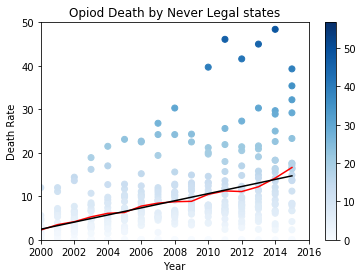

r value: 0.45590251351203165


In [26]:
#Never legalized data analysis
x = NeverStates_df["Year"]
y = NeverStates_df["Death_Rate"]
cm = plt.cm.get_cmap('Blues')
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#averages for use with lineplot
aveMed= NeverStates_df.groupby(['Year'])
y2=aveMed.mean()["Death_Rate"]

plt.scatter(x,y, cmap=cm, c=y)
plt.plot(y2, color= 'r')
plt.plot(x,regress_values,"y-", color="black")
plt.title('Opiod Death by Never Legal states')
plt.ylabel("Death Rate")
plt.xlabel("Year")
plt.xlim(2000, 2016) 
plt.ylim(0,50) 
plt.colorbar()
plt.show()
print(f'r value: {rvalue}')

### Other Visualizations

In [27]:
#import data top ten death rate states RX
csv_pathRX = "RXTopTen.csv"
RX = pd.read_csv(csv_pathRX) 
RX.iloc[:0]
RX

,Year,Kentucky,Nevada,New Hampshire,New Mexico,Ohio,Oklahoma,Oregon,Utah,Washington,West Virginia,Sum
0,2017,86.8,73.0,52.8,56.4,63.5,88.1,66.1,63.8,57.2,81.3,689.0
1,2016,97.2,80.7,64.3,65.1,75.3,97.9,76.3,70.4,64.9,96.0,788.1
2,2015,102.6,85.4,74.8,69.8,82.7,104.4,84.2,74.4,69.8,111.3,859.4
3,2014,110.0,90.1,79.6,71.5,89.5,110.9,91.9,78.8,74.2,126.4,922.9
4,2013,111.7,91.1,82.0,71.4,93.1,123.3,94.2,82.1,75.2,129.0,953.1
5,2012,127.9,98.9,83.7,76.8,97.5,127.4,98.7,84.5,78.7,136.9,1011.0
6,2011,137.0,100.3,80.9,81.6,101.5,122.3,100.7,85.2,81.6,139.6,1030.7
7,2010,136.5,97.3,81.6,81.9,102.4,119.6,101.2,86.6,85.0,143.1,1035.2
8,2009,135.2,94.0,81.5,75.3,100.4,115.0,99.3,86.9,86.1,146.9,1020.6
9,2008,136.6,97.0,81.7,71.4,97.5,111.3,99.1,91.3,86.6,145.5,1018.0


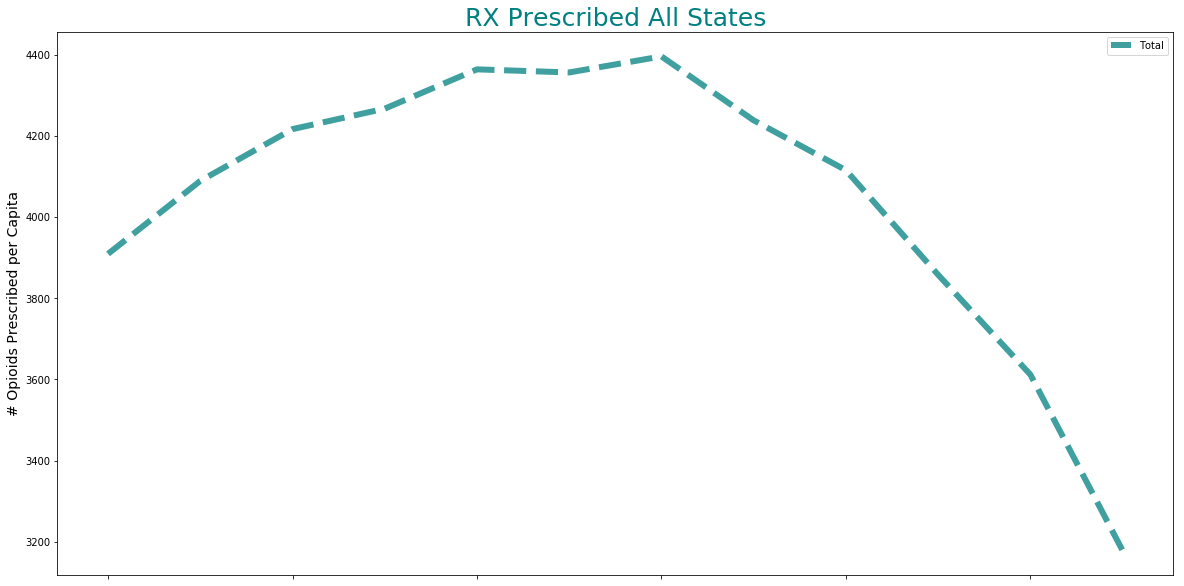

In [28]:
prescriptions_df = (pd.read_csv("Prescriptions.csv",index_col ="State"))
prescriptions_df.iloc[:0]
#prescriptions_df

sum_year = pd.DataFrame(prescriptions_df.sum(axis = 0, skipna = True) )
sum_year.rename(columns = {sum_year.columns[0]: 'Total'}, inplace = True)
sum_year.sort_index(inplace=True)
sum_year

sum_year.plot(y='Total', kind='line', alpha=0.75, color="teal", linewidth=6, linestyle='dashed', stacked=False, figsize=(20, 10))
plt.ylabel('# Opioids Prescribed per Capita', fontsize=14, fontweight=0)
plt.title('RX Prescribed All States', loc='center', fontsize=25, fontweight=0, color='teal')
plt.show()

In [39]:
rx_df = (pd.read_csv("Prescriptions.csv"))


In [40]:
renameYear_df= rx_df.rename(columns={'Year 2017':'2017','Year 2016':'2016','Year 2015':'2015','Year 2014':'2014'
                                               ,'Year 2013':'2013','Year 2012':'2012','Year 2011':'2011','Year 2010':'2010',
                                               'Year 2009':'2009','Year 2008':'2008','Year 2007':'2007','Year 2006':'2006'})
renameYear_df.head()

,State,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,Alabama,107.2,121.0,125.0,135.2,142.4,143.8,136.6,134.3,131.6,126.1,120.3,115.6
1,Alaska,52.0,58.9,60.8,62.7,63.7,66.8,68.0,68.4,67.3,68.5,66.6,63.4
2,Arizona,61.2,70.2,75.5,79.7,80.4,85.3,88.6,88.5,84.2,80.9,77.8,74.3
3,Arkansas,105.4,114.6,117.2,123.2,120.9,121.8,115.2,120.8,116.0,112.1,108.2,98.3
4,California,39.5,44.8,47.7,52.7,54.4,56.4,55.9,55.8,55.6,55.1,53.6,51.0


In [41]:
transpose = renameYear_df.transpose()
transpose

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2017,107.2,52,61.2,105.4,39.5,52.9,48,68.3,28.5,60.9,...,49,94.4,53.1,63.8,50.5,52.9,57.2,81.3,52.6,64.8
2016,121,58.9,70.2,114.6,44.8,59.8,55.9,79.2,32.5,66.6,...,54.8,107.5,57.6,70.4,58.6,63.4,64.9,96,62.2,71.1
2015,125,60.8,75.5,117.2,47.7,65.1,62.3,84.4,35.7,67.1,...,59.1,114.9,59.8,74.4,60.1,68.1,69.8,111.3,67.5,75.4
2014,135.2,62.7,79.7,123.2,52.7,69.6,66,91,40.1,71.4,...,61.7,121.3,67,78.8,50.4,73.5,74.2,126.4,71.9,80.9
2013,142.4,63.7,80.4,120.9,54.4,71.2,67.4,92.7,41.1,73.5,...,60.6,127.1,70,82.1,52.2,76.6,75.2,129,73.8,81.5
2012,143.8,66.8,85.3,121.8,56.4,73.5,69.3,94,40.3,75.9,...,60.1,136.1,73.4,84.5,54.6,79.6,78.7,136.9,76.8,80.5
2011,136.6,68,88.6,115.2,55.9,73,69.1,99.7,39.8,83.5,...,55.1,138.5,72,85.2,53.6,76.6,81.6,139.6,75.2,78.2
2010,134.3,68.4,88.5,120.8,55.8,72,68.6,101.1,37.1,87.6,...,54,140,73,86.6,54.1,75.5,85,143.1,74.4,80.4
2009,131.6,67.3,84.2,116,55.6,69.8,68.1,97.5,34.4,86.3,...,52.3,138.4,71.8,86.9,54.5,74.1,86.1,146.9,71.9,81


In [62]:
transpose.to_csv('transposeRX.csv', index=False, header=True)

In [42]:
states = pd.DataFrame(rx_df["State"])
states['Year']=""
states


,State,Year
0,Alabama,
1,Alaska,
2,Arizona,
3,Arkansas,
4,California,
5,Colorado,
6,Connecticut,
7,Delaware,
8,District of Columbia,
9,Florida,


In [47]:
array =[]
for i in renameYear_df:
    print(i)
    array.append(i)

State
2017
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006


In [48]:
array.pop(0)

'State'

In [49]:
array


['2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006']

In [56]:
newdf = pd.DataFrame()

In [57]:
for i in states['State']:
    for j in array:
        print(i)
        print(j)
        newdf = newdf.append([{'State':i,"Year":int(j)}],ignore_index=True, verify_integrity = True)

Alabama
2017
Alabama
2016
Alabama
2015
Alabama
2014
Alabama
2013
Alabama
2012
Alabama
2011
Alabama
2010
Alabama
2009
Alabama
2008
Alabama
2007
Alabama
2006
Alaska
2017
Alaska
2016
Alaska
2015
Alaska
2014
Alaska
2013
Alaska
2012
Alaska
2011
Alaska
2010
Alaska
2009
Alaska
2008
Alaska
2007
Alaska
2006
Arizona
2017
Arizona
2016
Arizona
2015
Arizona
2014
Arizona
2013
Arizona
2012
Arizona
2011
Arizona
2010
Arizona
2009
Arizona
2008
Arizona
2007
Arizona
2006
Arkansas
2017
Arkansas
2016
Arkansas
2015
Arkansas
2014
Arkansas
2013
Arkansas
2012
Arkansas
2011
Arkansas
2010
Arkansas
2009
Arkansas
2008
Arkansas
2007
Arkansas
2006
California
2017
California
2016
California
2015
California
2014
California
2013
California
2012
California
2011
California
2010
California
2009
California
2008
California
2007
California
2006
Colorado
2017
Colorado
2016
Colorado
2015
Colorado
2014
Colorado
2013
Colorado
2012
Colorado
2011
Colorado
2010
Colorado
2009
Colorado
2008
Colorado
2007
Colorado
2006
Connecticut
2017

In [59]:
with pd.option_context('display.max_rows', None, "display.max_columns", None):
    print(newdf)

                    State  Year
0                 Alabama  2017
1                 Alabama  2016
2                 Alabama  2015
3                 Alabama  2014
4                 Alabama  2013
5                 Alabama  2012
6                 Alabama  2011
7                 Alabama  2010
8                 Alabama  2009
9                 Alabama  2008
10                Alabama  2007
11                Alabama  2006
12                 Alaska  2017
13                 Alaska  2016
14                 Alaska  2015
15                 Alaska  2014
16                 Alaska  2013
17                 Alaska  2012
18                 Alaska  2011
19                 Alaska  2010
20                 Alaska  2009
21                 Alaska  2008
22                 Alaska  2007
23                 Alaska  2006
24                Arizona  2017
25                Arizona  2016
26                Arizona  2015
27                Arizona  2014
28                Arizona  2013
29                Arizona  2012
30      

In [60]:
newdf


,State,Year
0,Alabama,2017
1,Alabama,2016
2,Alabama,2015
3,Alabama,2014
4,Alabama,2013
5,Alabama,2012
6,Alabama,2011
7,Alabama,2010
8,Alabama,2009
9,Alabama,2008


In [64]:
 newdf.to_csv('rxNew.csv',index=False,header=True)

In [65]:
rxRates_df = (pd.read_csv("RxRates.csv"))
rxRates_df.head()

,State,Year,Rx_rate
0,Alabama,2017,107.2
1,Alabama,2016,121.0
2,Alabama,2015,125.0
3,Alabama,2014,135.2
4,Alabama,2013,142.4


In [74]:
yearlist =['2006',"2007",'2008','2009','2010','2011','2012','2013', '2014','2015']

rx06_15= rxRates_df[rxRates_df['Year'].isin(yearlist)]

#NeverStates_df = Main_Table[Main_Table['State'].isin(NeverStates)]

In [75]:
rx06_15.head()


,State,Year,Rx_rate
2,Alabama,2015,125.0
3,Alabama,2014,135.2
4,Alabama,2013,142.4
5,Alabama,2012,143.8
6,Alabama,2011,136.6


In [77]:
main06_15 = Main_Table[Main_Table['Year'].isin(yearlist)]



In [78]:
mergeRX = pd.merge(main06_15, rx06_15, left_on=["State","Year"], right_on=['State' ,'Year'], how="left")
mergeRX.count()

State                      470
Year                       470
Death_Rate                 470
Deaths                     470
Multiple_Cause_of_death    470
Medical                    470
Recreational               470
percent_change             458
Rx_rate                    470
dtype: int64

In [80]:
mergeRX.head()

,State,Year,Death_Rate,Deaths,Multiple_Cause_of_death,Medical,Recreational,percent_change,Rx_rate
0,Wyoming,2006,0.0,0.0,All Opioids,False,False,NaN,79.9
1,Wyoming,2007,0.0,0.0,All Opioids,False,False,NaN,80.8
2,Wyoming,2008,5.8,35.0,All Opioids,False,False,NaN,81.0
3,Wyoming,2009,0.0,27.0,All Opioids,False,False,-0.228571,81.0
4,Wyoming,2010,7.7,33.0,All Opioids,False,False,0.222222,80.4


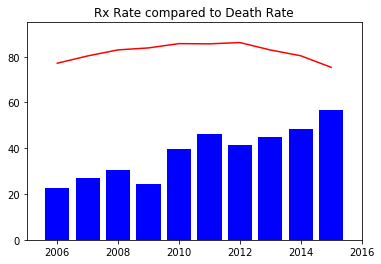

In [102]:

x = mergeRX["Year"]
y = mergeRX["Death_Rate"]
y2= mergeRX['Rx_rate']


#average of RX rate for use with lineplot
aveRX= mergeRX.groupby(['Year'])
y2=aveRX.mean()["Rx_rate"]

plt.bar(x,y, color= "b")
plt.plot(y2, color= 'r')

plt.title('Rx Rate compared to Death Rate')

plt.xlim(2005, 2016) 
plt.ylim(0,95) 
# plt.colorbar()
plt.show()
